https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators


https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/

In [25]:
import warnings  # Importing warnings to handle warning messages
warnings.filterwarnings('ignore')  # Ignore warning messages to avoid cluttering the output

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


from sklearn.feature_selection import mutual_info_classif

from sklearn.model_selection import train_test_split, RandomizedSearchCV  # To split the data into training and testing sets
from sklearn.preprocessing import StandardScaler  # To standardize the dataset for better model performance

from sklearn.linear_model import LogisticRegression  # For building Logistic Regression models
from sklearn.ensemble import RandomForestClassifier  # Importing Random Forest Classifier for modeling

# Importing evaluation metrics to assess model performance
from sklearn.metrics import (
    accuracy_score,  # To calculate accuracy
    precision_score,  # To calculate precision
    recall_score,  # To calculate recall
    f1_score,  # To calculate the F1-score
    confusion_matrix,  # To compute the confusion matrix
    ConfusionMatrixDisplay,  # To display the confusion matrix
    precision_recall_curve,
    average_precision_score,
    classification_report,  # To generate a detailed classification report
    make_scorer,  # To customize scoring metrics
    roc_curve,  # To plot the ROC curve
    roc_auc_score,  # To calculate the area under the ROC curve
    PrecisionRecallDisplay # To plot precision-recall curves
    
)

from sklearn.calibration import calibration_curve

# Saving The Best Model and Scaler
import os
import pickle


%matplotlib inline

In [2]:
# From kaggle dataset
#df= pd.read_csv('/kaggle/input/diabetes-binary-health-indicators-brfss2015/diabetes_binary_health_indicators_BRFSS2015.csv')

In [3]:
df= pd.read_csv('datasets/diabetes_binary_health_indicators_BRFSS2015.csv')
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [4]:
df.shape

(253680, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

### Description of each features

Medical Conditions/Metrics:
- Diabetes_binary: Diabetes status (0: no diabetes, 1: diabetes)
- HighBP: High blood pressure (yes/no)
- HighChol: High cholesterol (yes/no)
- CholCheck: Cholesterol check in past 5 years (yes/no)
- BMI: Body Mass Index
- Stroke: Ever had a stroke (yes/no)
- HeartDiseaseorAttack: History of heart disease/attack (yes/no)

Lifestyle Factors:
- Smoker: Have you smoked 100 cigarettes in your life? (yes/no)
- PhysActivity: Physical activity in past 30 days (yes/no)
- Fruits: Consume fruit 1+ times per day (yes/no)
- Veggies: Consume vegetables 1+ times per day (yes/no)
- HvyAlcoholConsump: Heavy alcohol consumption (yes/no)

Healthcare Access:
- AnyHealthcare: Have any healthcare coverage (yes/no)
- NoDocbcCost: Could not see doctor due to cost (yes/no)

Health Status:
- GenHlth: General health rating (1-5 scale, 1=excellent, 5=poor)
- MentHlth: Days of poor mental health in past 30 days (0-30)
- PhysHlth: Days of poor physical health in past 30 days (0-30)
- DiffWalk: Difficulty walking/climbing stairs (yes/no)

Demographics:
- Sex: Gender
- Age: Age group (categorical)
- Education: Education level
- Income: Income level


# EXPLORATORY DATA ANALYSIS

In [6]:
def Explore_dataset(df):
    print("1. Dataset Dimensions:", df.shape)
    print("\n2. Column Names:\n", df.columns.tolist())
    print("\n3. Summary Info:")
    df.info()
    print("\n4. Missing Values per Column:\n", df.isna().sum())
    print("\n5. Duplicate Rows:", df.duplicated().sum())
    print("\n6. Duplicate Columns:", df.T.duplicated().sum())

    # Detect Outliers
    outlier_counts = {
        col: len(df[(df[col] < df[col].quantile(0.10) - 1.5 * (df[col].quantile(0.90) - df[col].quantile(0.10))) |
                    (df[col] > df[col].quantile(0.90) + 1.5 * (df[col].quantile(0.90) - df[col].quantile(0.10)))])
        for col in df.select_dtypes(include='number').columns
    }
    print("\n7. Outlier Counts:\n", outlier_counts)


Explore_dataset(df)

1. Dataset Dimensions: (253680, 22)

2. Column Names:
 ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

3. Summary Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivit

In [7]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


# DATA VISUALIZATION

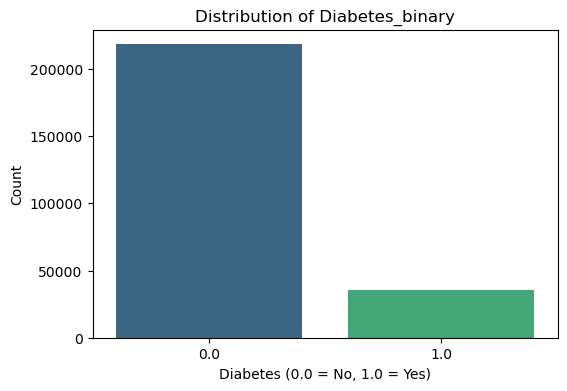

In [8]:
# Class Distribution of the target variable

plt.figure(figsize=(6,4))
sns.countplot(data = df, x='Diabetes_binary', palette='viridis')
plt.title('Distribution of Diabetes_binary')
plt.xlabel('Diabetes (0.0 = No, 1.0 = Yes)')
plt.ylabel('Count')
plt.show()

In [9]:
# Percentage value counts for diabetes_binary
diabetes_counts = df.Diabetes_binary.value_counts(normalize=True) * 100
diabetes_counts

0.0    86.066698
1.0    13.933302
Name: Diabetes_binary, dtype: float64

In [10]:
# Demographic Features

In [11]:
demographic_features = ['Sex', 'Age_groups', 'Education', 'Income']

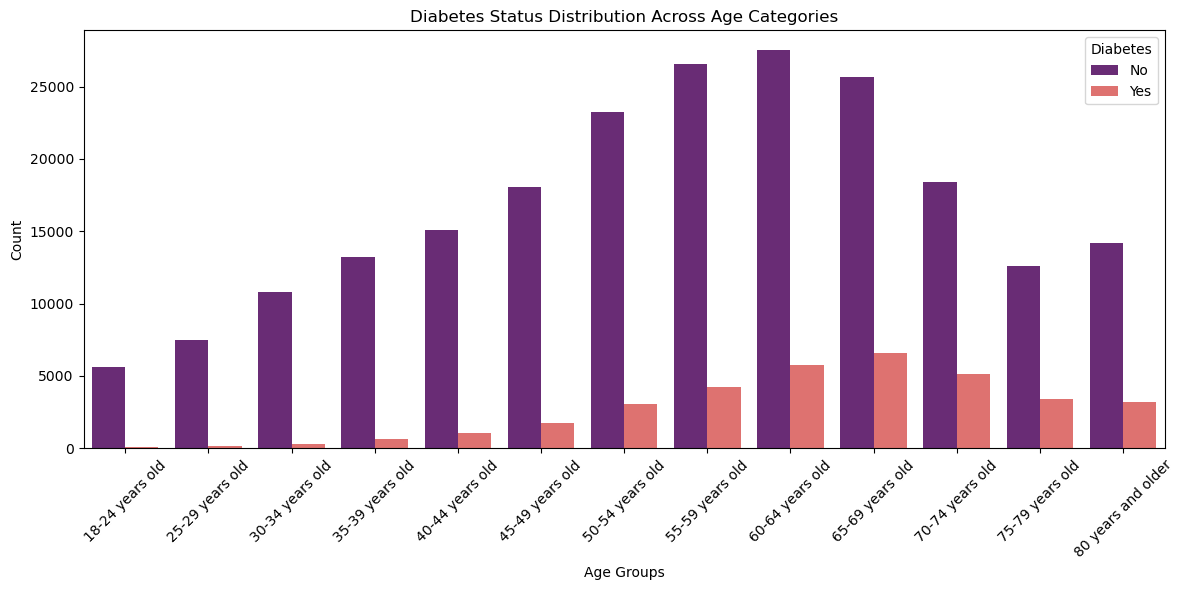

In [12]:
# Visualizing the relationship between Age and Diabetes_binary

# Defining the age mapping dictionary
age_map = {
    1: "18-24 years old",
    2: "25-29 years old",
    3: "30-34 years old",
    4: "35-39 years old",
    5: "40-44 years old",
    6: "45-49 years old",
    7: "50-54 years old",
    8: "55-59 years old",
    9: "60-64 years old",
    10: "65-69 years old",
    11: "70-74 years old",
    12: "75-79 years old",
    13: "80 years and older"
}

# Mapping the numeric Age column to readable age categories
df['Age_groups'] = df['Age'].map(age_map)

# Creating an ordered list of age categories based on the dictionary keys
age_order = [age_map[i] for i in sorted(age_map.keys())]


plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Age_groups', hue='Diabetes_binary', palette='magma', order=age_order)
plt.title("Diabetes Status Distribution Across Age Categories")
plt.xlabel("Age Groups")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Diabetes", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

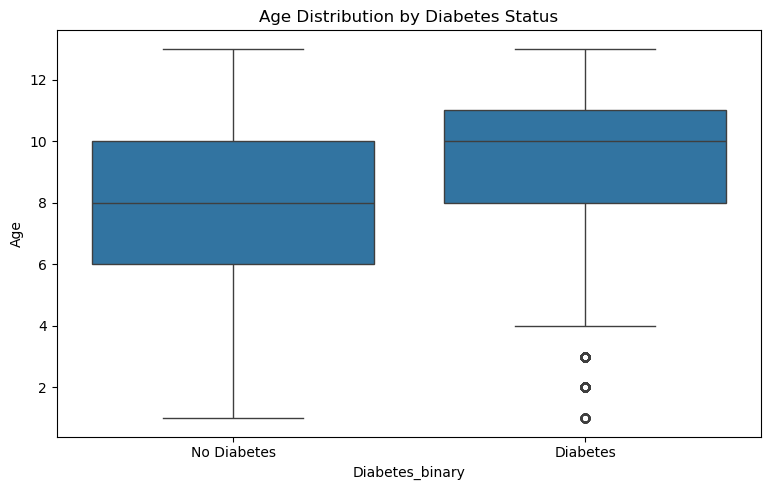

In [13]:
# Age Distribution

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Diabetes_binary', y='Age')
plt.title('Age Distribution by Diabetes Status')

# Replacing numerical Sex labels with 'Male' and 'Female'

plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.tight_layout()
plt.show()


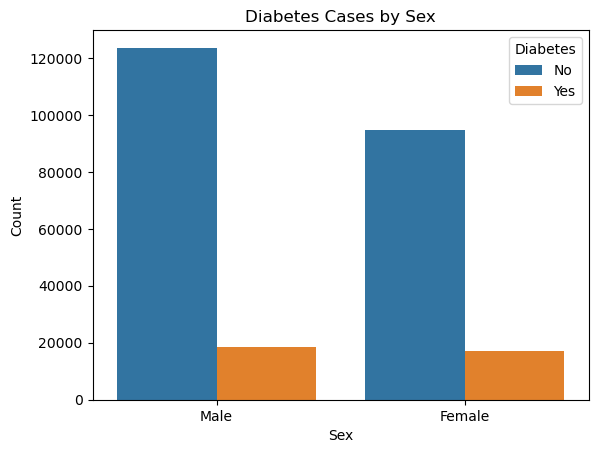

In [14]:
# Use countplot to show counts of each Diabetes_binary category grouped by Sex
sns.countplot(data=df, x='Sex', hue='Diabetes_binary')

# Customize the plot
plt.title('Diabetes Cases by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

# Replacing numerical Sex labels with 'Male' and 'Female'
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])

# Add legend with appropriate labels
plt.legend(title='Diabetes', labels=['No', 'Yes'], loc='best')

plt.show()

In [15]:
income_levels = {
    1: "Less than $10,000",
    2: "$10,000 to less than $15,000",
    3: "$15,000 to less than $20,000",
    4: "$20,000 to less than $25,000",
    5: "$25,000 to less than $35,000",
    6: "$35,000 to less than $50,000",
    7: "$50,000 to less than $75,000",
    8: "$75,000 or more"
}
education_levels = {
    1: "Never attended school or only kindergarten",
    2: "Grades 1-8 (Elementary)",
    3: "Grades 9-11 (Some high school)",
    4: "Grade 12 or GED (High school graduate)",
    5: "College 1-3 years (Some college or technical school)",
    6: "College 4 years or more (College graduate)"
}

In [16]:
df['Income'] = df['Income'].map(income_levels)
df['Education'] = df['Education'].map(education_levels)

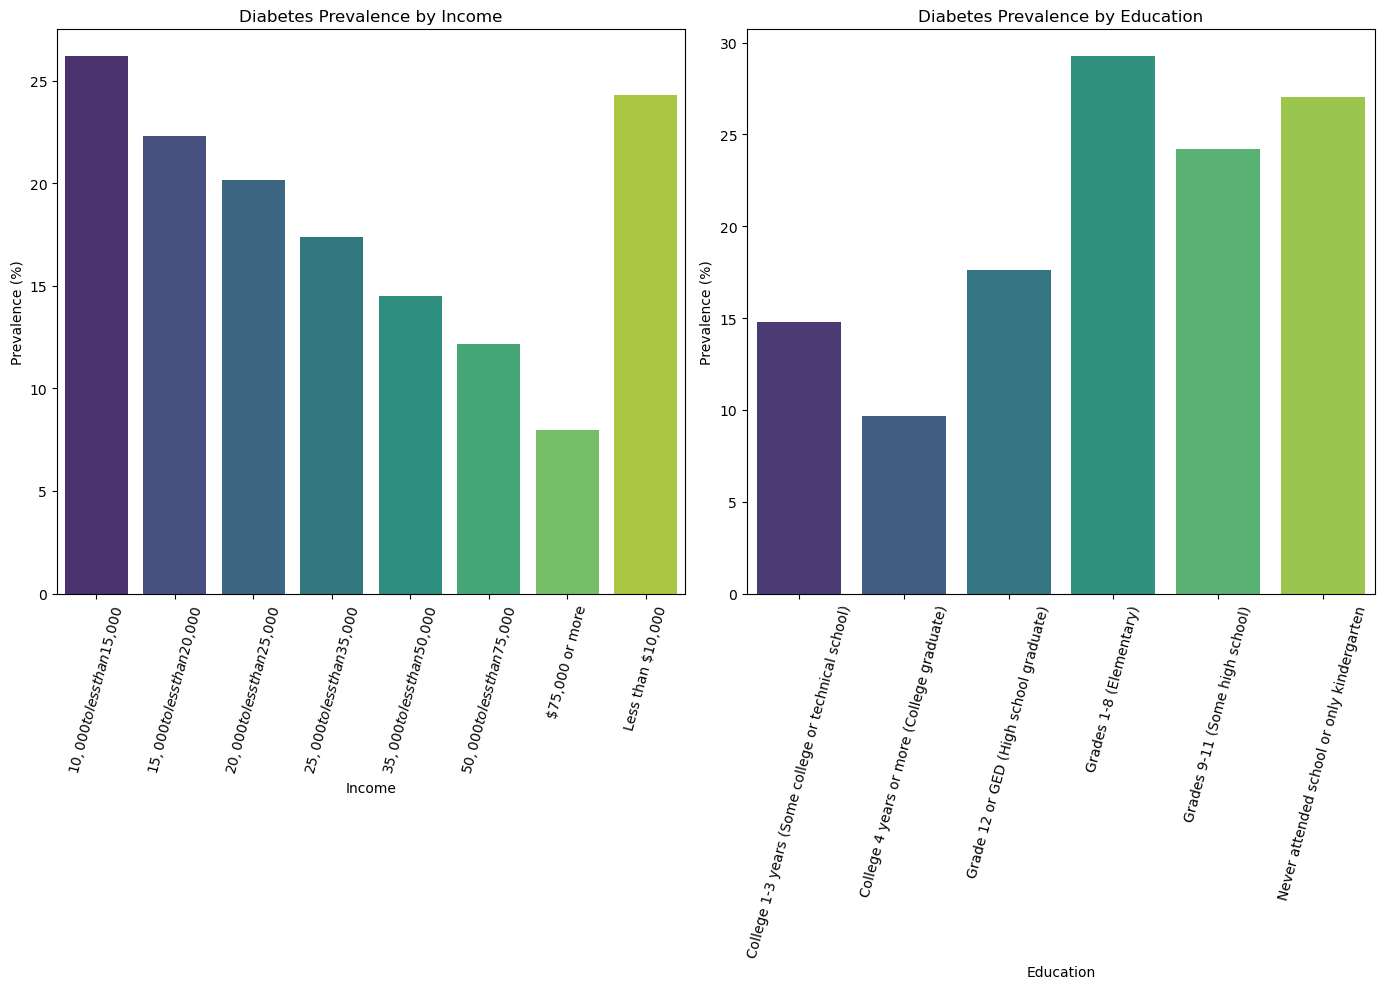

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 10))
for ax, col in zip(axes, ['Income', 'Education']):
    grp = df.groupby(col)['Diabetes_binary'].mean() * 100
    sns.barplot(x=grp.index, y=grp.values, ax=ax, palette="viridis")
    ax.set(title=f"Diabetes Prevalence by {col}",
           xlabel=col,
           ylabel="Prevalence (%)")
    ax.tick_params(axis='x', rotation=75)
plt.tight_layout()
plt.show()

In [28]:
# # Income Plot
# income_grp = df.groupby('Income')['Diabetes_binary'].mean() * 100
# plt.figure(figsize=(7, 5))
# sns.barplot(x=income_grp.index, y=income_grp.values, palette="viridis")
# plt.title("Diabetes Prevalence by Income")
# plt.xlabel("Income Level")
# plt.ylabel("Prevalence (%)")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


In [27]:
# # Education Plot
# edu_grp = df.groupby('Education')['Diabetes_binary'].mean() * 100
# plt.figure(figsize=(7, 5))
# sns.barplot(x=edu_grp.index, y=edu_grp.values, palette="viridis")
# plt.title("Diabetes Prevalence by Education")
# plt.xlabel("Education Level")
# plt.ylabel("Prevalence (%)")
# plt.xticks(rotation=75)
# plt.tight_layout()
# plt.show()

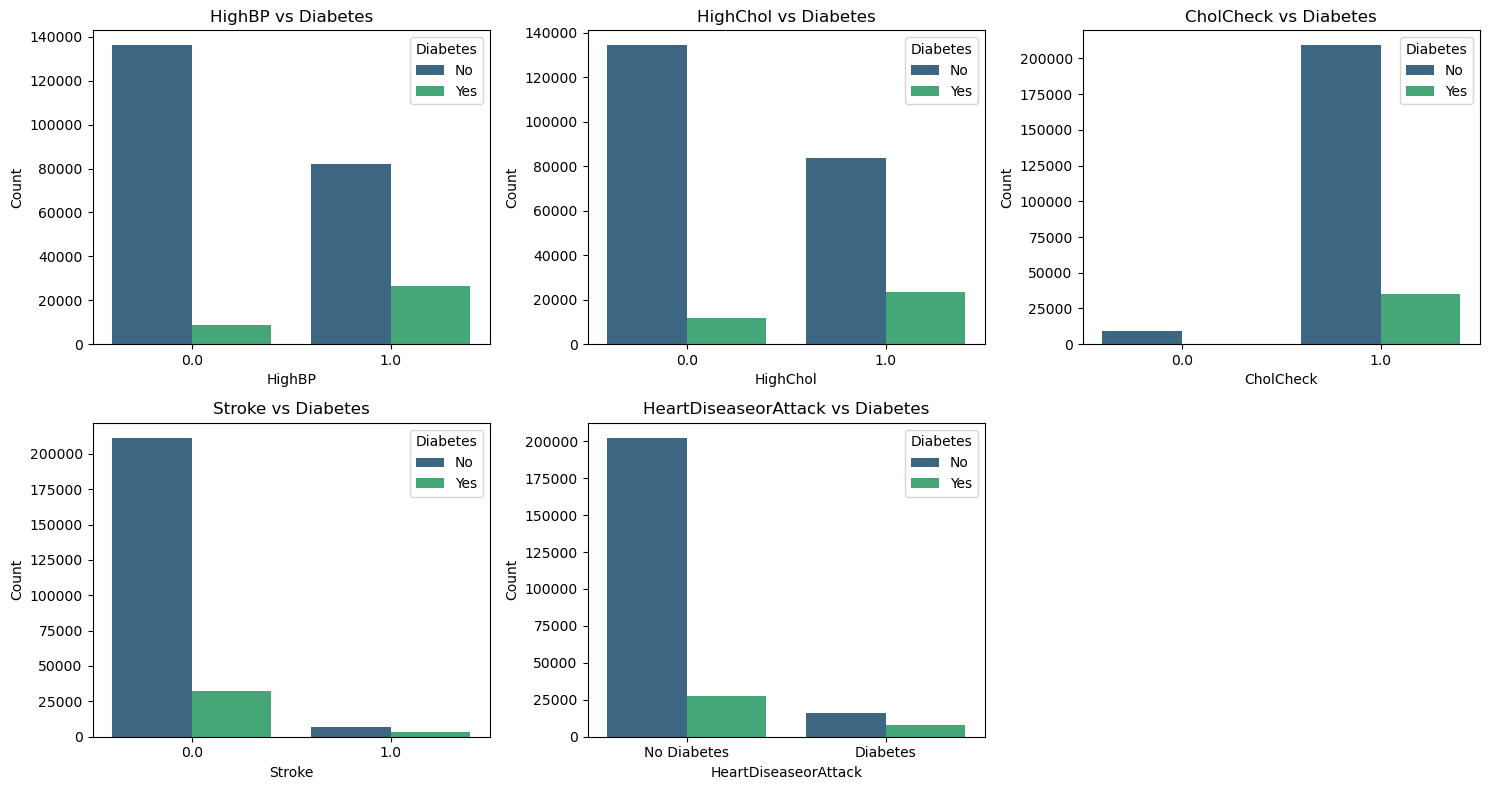

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Define categorical and continuous features
cat_features = ['HighBP', 'HighChol', 'CholCheck', 'Stroke', 'HeartDiseaseorAttack']

# Plot categorical features in a grid (3 columns per row)
n_cols = 3
n_rows = math.ceil(len(cat_features) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(cat_features):
    sns.countplot(data=df, x=col, hue='Diabetes_binary', ax=axes[i], palette='viridis')
    axes[i].set_title(f"{col} vs Diabetes")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].legend(title="Diabetes", labels=["No", "Yes"])

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.xticks([0, 1], ["No Diabetes", "Diabetes"])

plt.tight_layout()

plt.show()


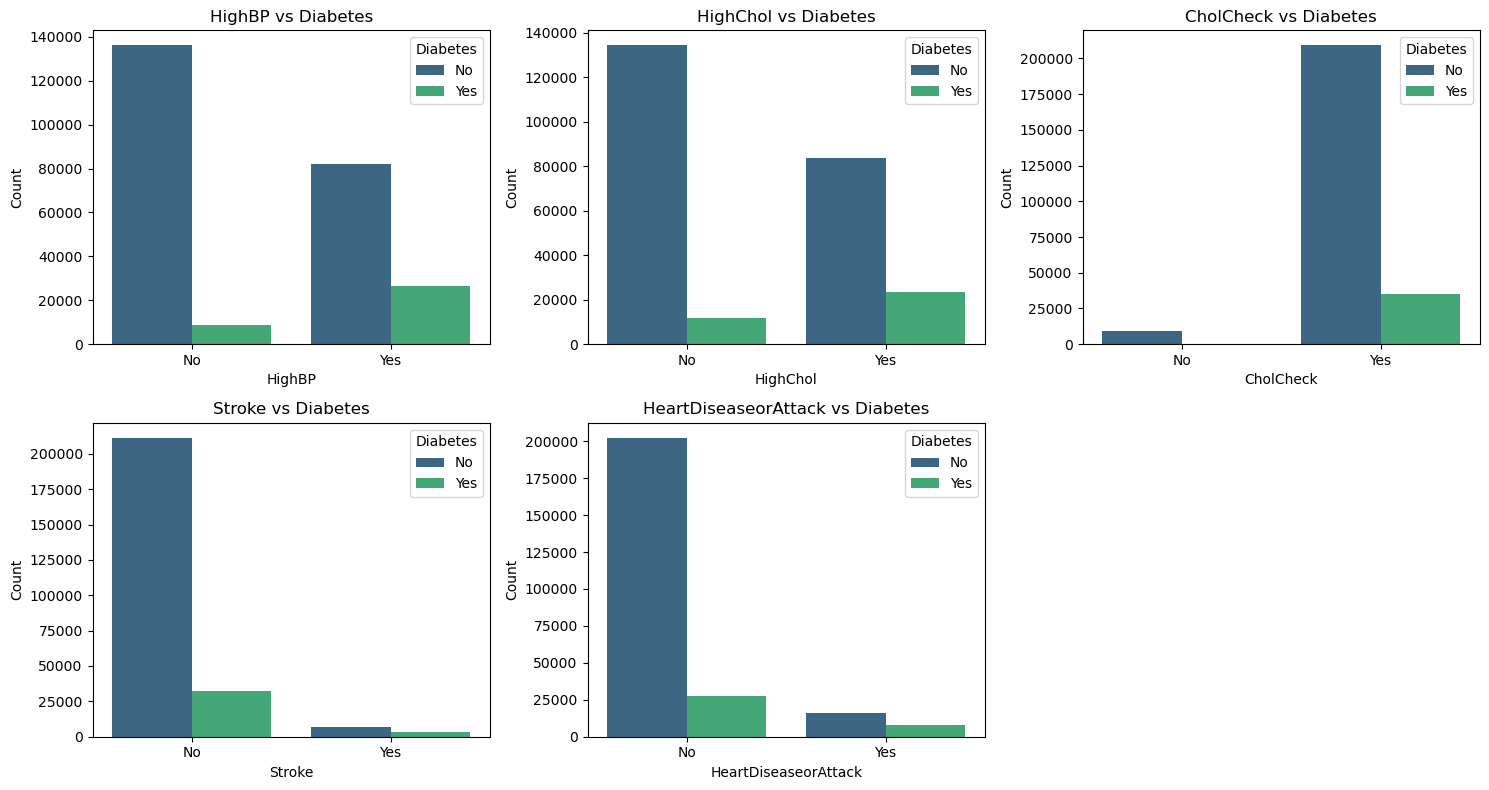

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Define categorical features (assumed binary: 0 = No, 1 = Yes)
cat_features = ['HighBP', 'HighChol', 'CholCheck', 'Stroke', 'HeartDiseaseorAttack']

# Create subplots: 3 columns per row
n_cols = 3
n_rows = math.ceil(len(cat_features) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(cat_features):
    sns.countplot(data=df, x=col, hue='Diabetes_binary', ax=axes[i], palette='viridis')
    axes[i].set_title(f"{col} vs Diabetes")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].legend(title="Diabetes", labels=["No", "Yes"])
    # Set binary tick labels
    axes[i].set_xticklabels(["No", "Yes"])

# Remove any extra axes if necessary
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


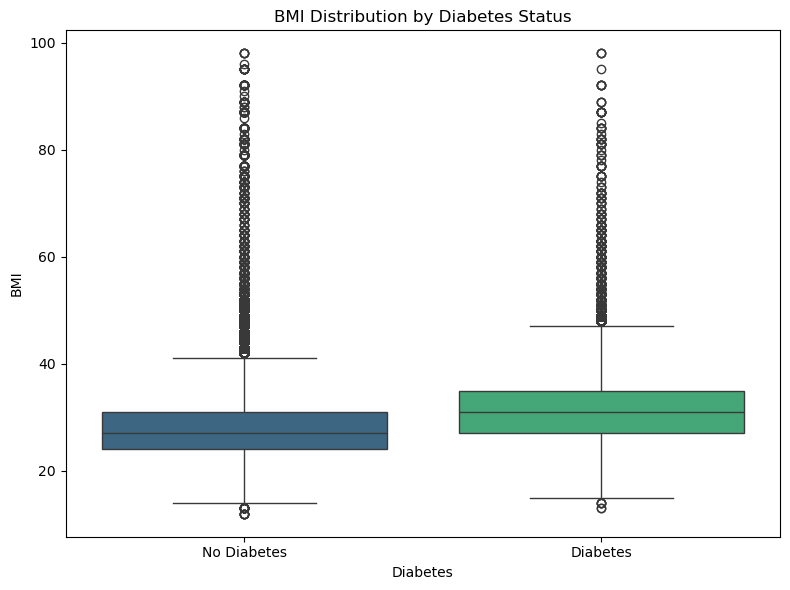

In [37]:
# Analyzing BMI relationship with Diabetes_binary


# Plot BMI (continuous) using a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Diabetes_binary', y='BMI', palette='viridis')
plt.title("BMI Distribution by Diabetes Status")
plt.xlabel("Diabetes")
plt.ylabel("BMI")
plt.xticks([0, 1], ["No Diabetes", "Diabetes"])
plt.tight_layout()
plt.show()

Continuous Features: ['BMI', 'MentHlth', 'PhysHlth', 'Age_groups']


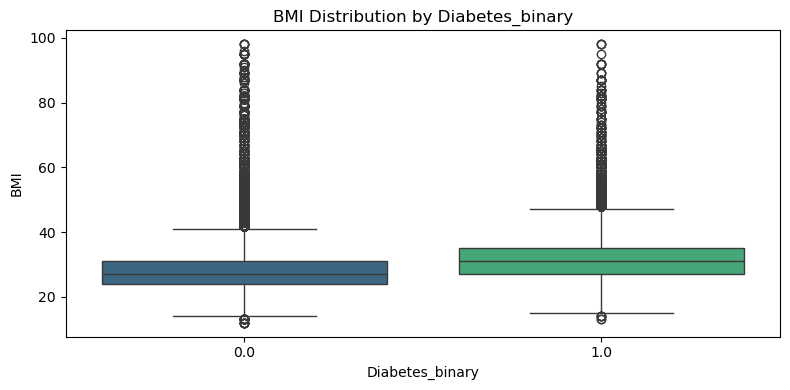

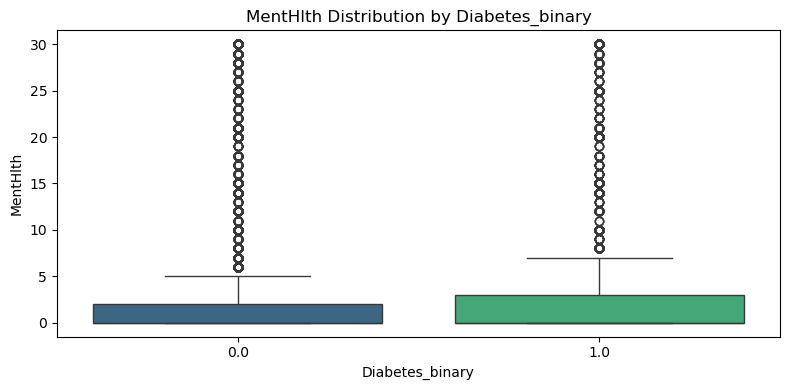

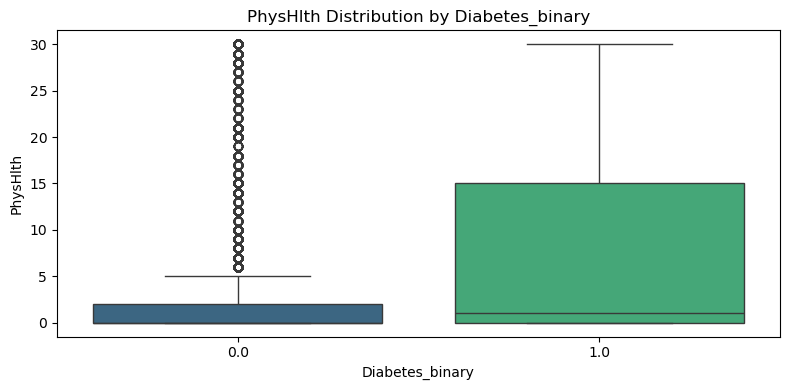

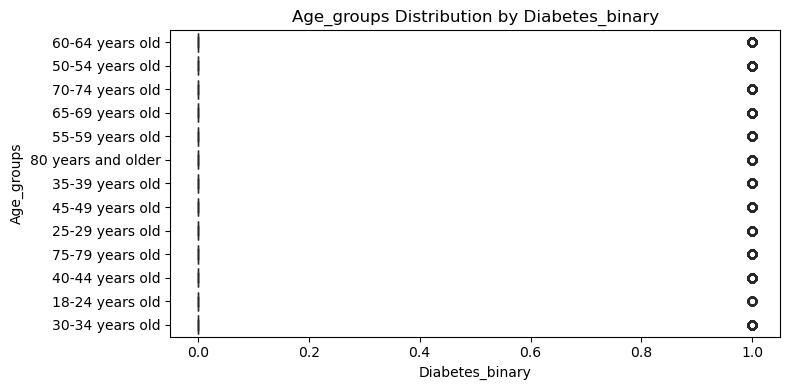

In [29]:
continuous_features = [col for col in features_to_compare if df[col].nunique() > 10]
print("Continuous Features:", continuous_features)

# --- Plot for Continuous Features ---
for col in continuous_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='Diabetes_binary', y=col, palette='viridis')
    plt.title(f"{col} Distribution by Diabetes_binary")
    plt.xlabel("Diabetes_binary")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

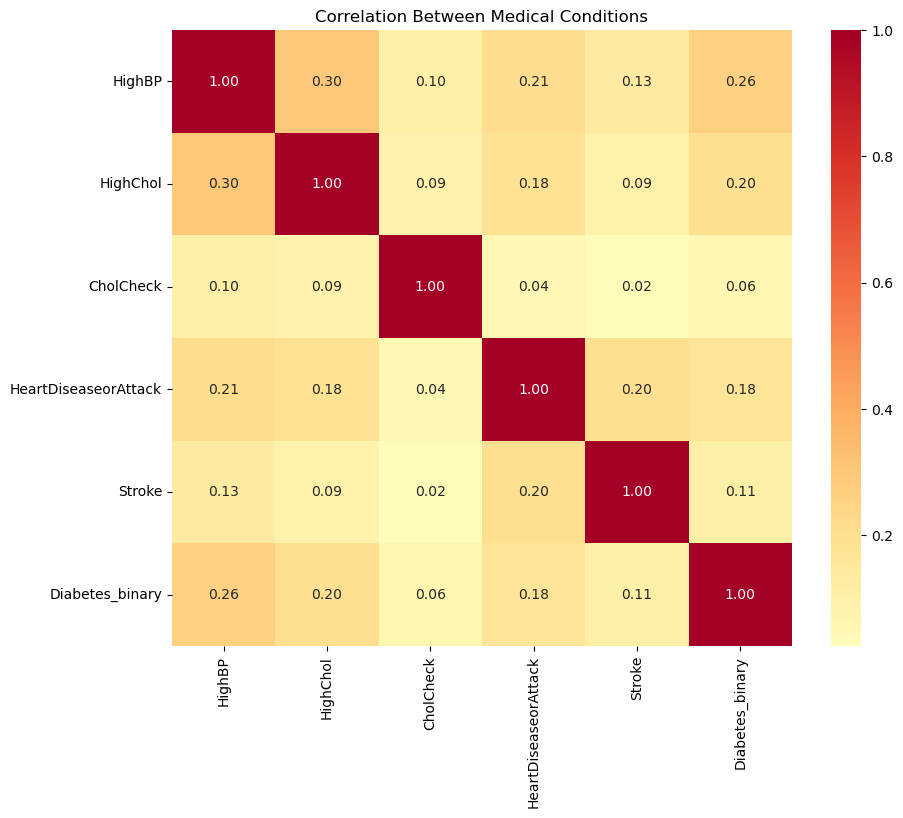

In [30]:

# Create heatmap of medical conditions correlations

medical_cols = ['HighBP', 'HighChol', 'CholCheck', 'HeartDiseaseorAttack', 'Stroke', 'Diabetes_binary']
    
plt.figure(figsize=(10, 8))
sns.heatmap(df[medical_cols].corr(), annot=True, cmap='RdYlBu_r', center=0, fmt='.2f')
plt.title('Correlation Between Medical Conditions')
plt.show()
    

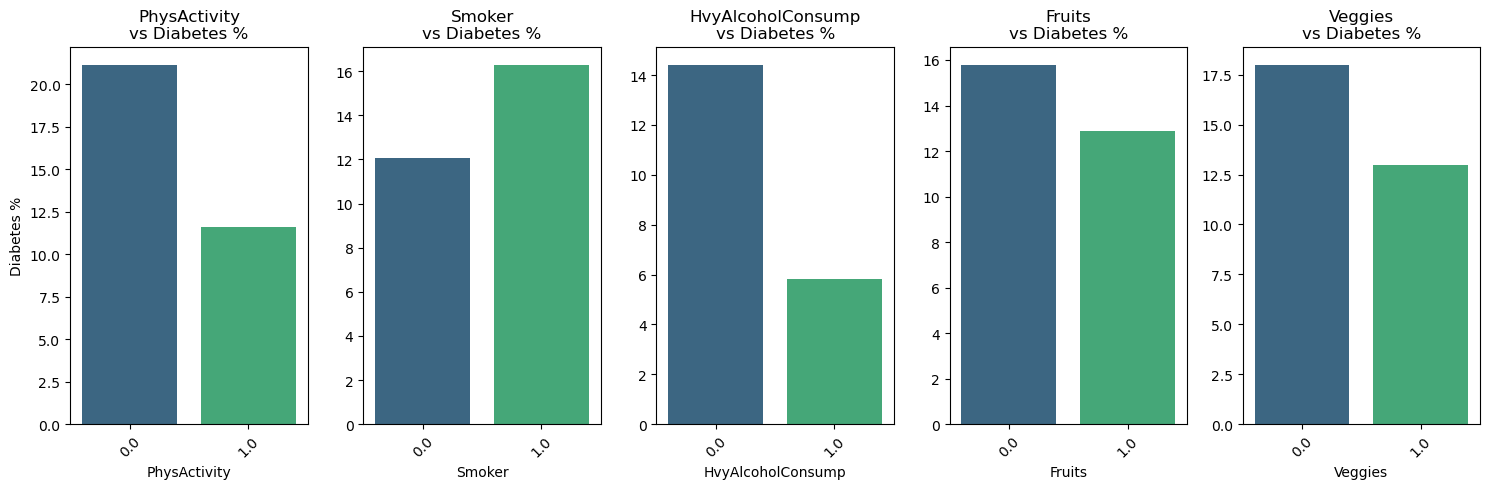

In [31]:

# Analyze lifestyle factors impact

lifestyle_cols = ['PhysActivity', 'Smoker', 'HvyAlcoholConsump', 
                     'Fruits', 'Veggies']
    
plt.figure(figsize=(15, 5))
    
for i, col in enumerate(lifestyle_cols, 1):
    plt.subplot(1, 5, i)
    diabetes_rates = df.groupby(col)['Diabetes_binary'].mean() * 100
    sns.barplot(data=diabetes_rates, palette='viridis')
    plt.title(f'{col}\nvs Diabetes %')
    plt.ylabel('Diabetes %' if i == 1 else '')
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

In [44]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Age_groups'],
      dtype='object')

# PREPROCESSING

In [78]:
df.duplicated().sum()

24206

In [79]:
df.drop_duplicates(inplace=True)

In [80]:
df.duplicated().sum()

0

# FEATURE SELECTION

I will consider how each individual features correlate with the target variable, their mutual information scores, and domain knowledge in season the features.

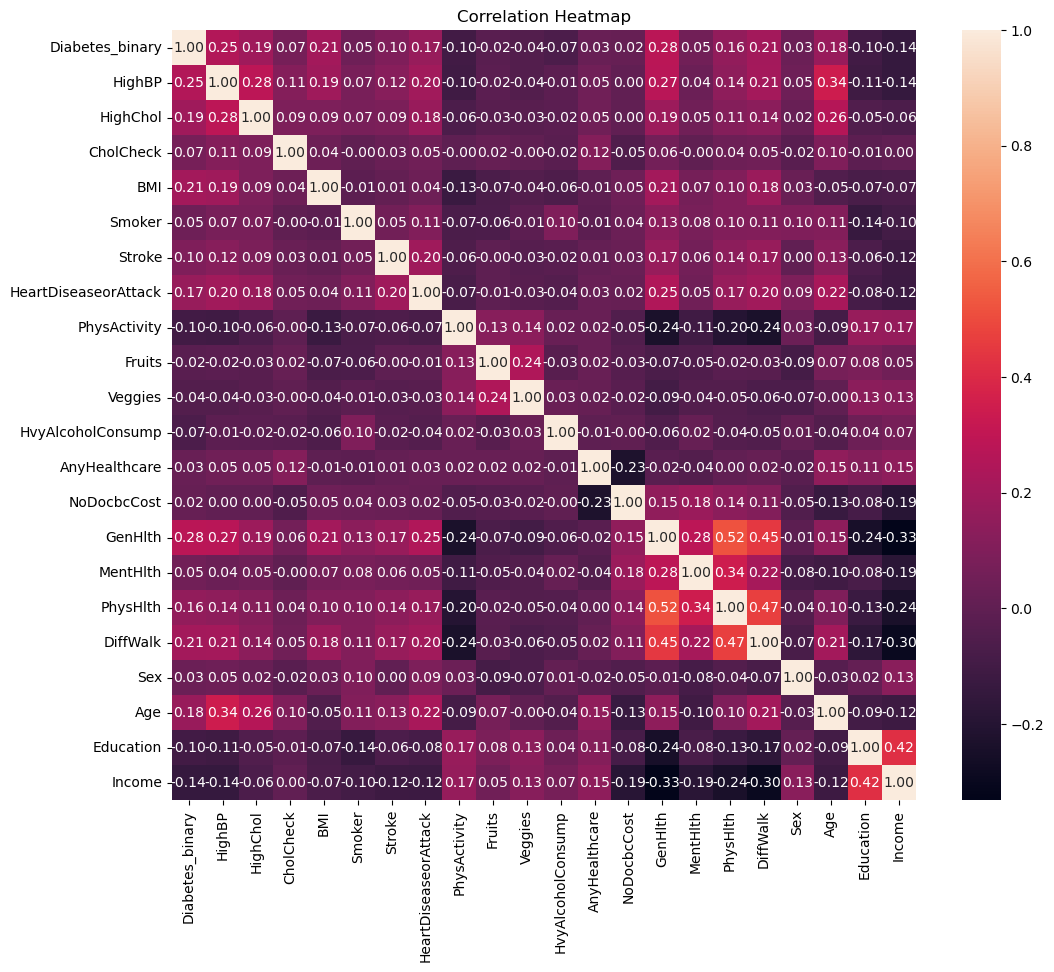

In [81]:
## Correlation matrix
plt.figure(figsize=(12,10))
corr=df.corr()
sns.heatmap(corr,annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



### Key Observations:
1. **Diabetes_binary and HighBP (Hypertension) (~0.25 correlation)**  
   - A moderate positive correlation suggests that people with high blood pressure have a higher likelihood of diabetes.
  
2. **Diabetes_binary and General Health (~0.28 correlation)**  
   - Poor general health is moderately associated with diabetes.
  
3. **HighBP and Age (~0.34 correlation)**  
   - As expected, older individuals tend to have higher blood pressure.
  
4. **HighBP and General Health (~0.27 correlation)**  
   - Poor general health is linked with higher blood pressure.
  
5. **General Health and Mental/Physical Health (~0.52, ~0.47 correlation respectively)**  
   - People reporting poor general health also report worse mental and physical health.
  
6. **Education and Income (~0.42 correlation)**  
   - Higher education is associated with higher income.

7. **Physical Activity and General Health (-0.24 correlation)**  
   - More physical activity is linked to better general health.

8. **Heavy Alcohol Consumption has weak correlations with most variables**  
   - This suggests it does not significantly impact most other health-related factors in this dataset.

In [82]:
# Removing Multicolinearity from the features if they exist

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
corr_features=correlation(df,0.85)
corr_features

set()

In [83]:
# Removing highly correlated features if any exists
df = df.drop(columns=corr_features)

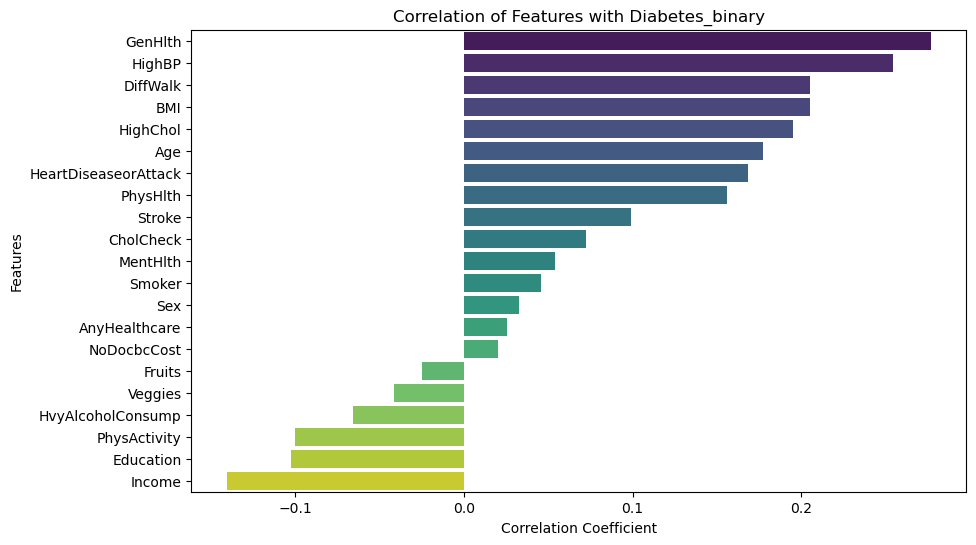

In [84]:
# Compute correlation matrix and select correlation with 'Diabetes_binary'
correlations = df.corr()['Diabetes_binary'].drop('Diabetes_binary')
correlations = correlations.sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')
plt.title('Correlation of Features with Diabetes_binary')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

Based on the coreletion relationship with the target GenHlth, HighBP, BMI, DiffWalk,  HighChol, Age,
HeartDiseaseorAttack, PhysHlth, Stroke, CholCheck, MentHlth, Smoker, Sex.

I would also pick HvyAlcoholConsump, PhysActivity, Education, Income because their negative correlation.


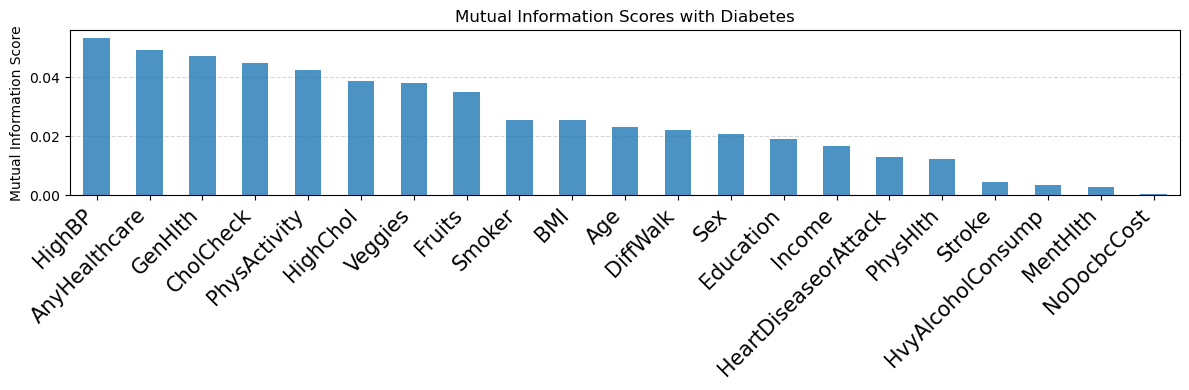


Mutual Information Scores:
HighBP                  0.053231
AnyHealthcare           0.049170
GenHlth                 0.047271
CholCheck               0.044731
PhysActivity            0.042323
HighChol                0.038710
Veggies                 0.037918
Fruits                  0.034874
Smoker                  0.025541
BMI                     0.025464
Age                     0.023130
DiffWalk                0.022141
Sex                     0.020923
Education               0.018939
Income                  0.016612
HeartDiseaseorAttack    0.012848
PhysHlth                0.012376
Stroke                  0.004651
HvyAlcoholConsump       0.003394
MentHlth                0.002877
NoDocbcCost             0.000647
dtype: float64


In [85]:
# Calculate mutual information scores

X = df.drop('Diabetes_binary', axis=1)  # Features
y = df['Diabetes_binary']  # Target

mi_scores = mutual_info_classif(X, y)

# Create a Series with feature names and their MI scores
mi_series = pd.Series(mi_scores, index=X.columns)
mi_series = mi_series.sort_values(ascending=False)

# Create the visualization
plt.figure(figsize=(12, 4))
mi_series.plot(kind='bar', alpha=0.8, zorder=3)
plt.title("Mutual Information Scores with Diabetes")
plt.grid(axis='y', linestyle='--', alpha=.5)
plt.xticks(rotation=45, ha='right', size=15)
plt.ylabel('Mutual Information Score')
plt.tight_layout()
plt.show()

# Print the scores
print("\nMutual Information Scores:")
print(mi_series)

In [86]:
# Features selected by both methods

feature_correlation = ['GenHlth', 'HighBP', 'BMI', 'DiffWalk', 'HighChol', 'Age',
         'HeartDiseaseorAttack', 'PhysHlth', 'Stroke', 'CholCheck', 'MentHlth', 
         'Smoker', 'Sex', 'HvyAlcoholConsump', 'PhysActivity', 'Education', 'Income']

mutual_information = ['HighBP', 'GenHlth', 'AnyHealthcare', 'CholCheck', 'PhysActivity', 
         'HighChol', 'Fruits', 'Veggies', 'BMI', 'Age', 'Smoker', 'DiffWalk', 'Sex']



# Combine lists and remove duplicates using set
combined_set = set(feature_correlation + mutual_information)

# Convert back to list for ordered representation
combined_features = list(combined_set)

print("Combined unique features as a list:")
print(combined_features)
print("\nNumber of unique features:", len(combined_features))
print("\nCombined unique features as a set:")
print(combined_set)
print("\nNumber of unique features:", len(combined_set))

Combined unique features as a list:
['MentHlth', 'GenHlth', 'HeartDiseaseorAttack', 'Stroke', 'Sex', 'DiffWalk', 'Veggies', 'Fruits', 'HighBP', 'PhysHlth', 'HighChol', 'HvyAlcoholConsump', 'Income', 'Age', 'CholCheck', 'Smoker', 'PhysActivity', 'BMI', 'Education', 'AnyHealthcare']

Number of unique features: 20

Combined unique features as a set:
{'MentHlth', 'GenHlth', 'HeartDiseaseorAttack', 'Stroke', 'Sex', 'DiffWalk', 'Veggies', 'Fruits', 'HighBP', 'PhysHlth', 'HighChol', 'HvyAlcoholConsump', 'Income', 'Age', 'CholCheck', 'Smoker', 'PhysActivity', 'BMI', 'Education', 'AnyHealthcare'}

Number of unique features: 20


In [87]:
# Making Final Feature Selection With Domain Knowledge
selected_features = ['PhysHlth', 'HvyAlcoholConsump', 'Smoker', 'CholCheck', 'Stroke', 
                     'GenHlth', 'MentHlth', 'Sex', 'Income', 'BMI', 'PhysActivity', 
                     'HeartDiseaseorAttack', 'AnyHealthcare', 'DiffWalk', 'HighChol', 
                     'Veggies', 'Education', 'Age', 'HighBP', 'Fruits', 'Diabetes_binary']

In [88]:
df = df[selected_features]

In [89]:
df.columns

Index(['PhysHlth', 'HvyAlcoholConsump', 'Smoker', 'CholCheck', 'Stroke',
       'GenHlth', 'MentHlth', 'Sex', 'Income', 'BMI', 'PhysActivity',
       'HeartDiseaseorAttack', 'AnyHealthcare', 'DiffWalk', 'HighChol',
       'Veggies', 'Education', 'Age', 'HighBP', 'Fruits', 'Diabetes_binary'],
      dtype='object')

'Diabetes_binary', 'HighBP', 'HighChol', 'BMI', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Income'

In [90]:
# Separating features (X) and target (y) for 

X = df.drop("Diabetes_binary",axis=1)
y = df["Diabetes_binary"]

In [91]:
"""Splitted the dataset to prevent data leakages when carrying out and Scaling"""

# Splitting the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.2, stratify=df['Diabetes_binary'], random_state=42 )

# """Splitted the dataset to prevent data leakages when carrying out and Scaling"""

# # Splitting the data into training and testing datasets
# = train_test_split(df, test_size=0.2, stratify=df['diagnosis'], random_state=42)

In [92]:
X_train.columns

Index(['PhysHlth', 'HvyAlcoholConsump', 'Smoker', 'CholCheck', 'Stroke',
       'GenHlth', 'MentHlth', 'Sex', 'Income', 'BMI', 'PhysActivity',
       'HeartDiseaseorAttack', 'AnyHealthcare', 'DiffWalk', 'HighChol',
       'Veggies', 'Education', 'Age', 'HighBP', 'Fruits'],
      dtype='object')

In [93]:
y_train.value_counts()

0.0    155501
1.0     28078
Name: Diabetes_binary, dtype: int64

In [94]:
# Standardizing the data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Scaling Completed!")

Scaling Completed!


In [95]:
feature_names = X_train.columns
feature_names

Index(['PhysHlth', 'HvyAlcoholConsump', 'Smoker', 'CholCheck', 'Stroke',
       'GenHlth', 'MentHlth', 'Sex', 'Income', 'BMI', 'PhysActivity',
       'HeartDiseaseorAttack', 'AnyHealthcare', 'DiffWalk', 'HighChol',
       'Veggies', 'Education', 'Age', 'HighBP', 'Fruits'],
      dtype='object')

In [96]:
# Convert scaled data back to DataFrames
X_train = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test = pd.DataFrame(X_test_scaled, columns=feature_names)

# Now X_train_scaled_df and X_test_scaled_df are DataFrames with column names

In [97]:
X_train.head()

,PhysHlth,HvyAlcoholConsump,Smoker,CholCheck,Stroke,GenHlth,MentHlth,Sex,Income,BMI,PhysActivity,HeartDiseaseorAttack,AnyHealthcare,DiffWalk,HighChol,Veggies,Education,Age,HighBP,Fruits
0,-0.517047,-0.254765,1.072035,0.205176,-0.215734,-0.563578,-0.455262,1.13290,0.529942,-0.395435,0.601961,-0.338755,-4.187359,-0.477229,-0.889095,0.509271,0.020709,-0.350440,1.096408,-1.256327
1,-0.517047,-0.254765,-0.932805,0.205176,-0.215734,0.375330,-0.455262,-0.88269,-1.381726,0.786628,0.601961,-0.338755,0.238814,-0.477229,1.124739,0.509271,-0.986375,0.620283,1.096408,-1.256327
2,-0.517047,-0.254765,-0.932805,0.205176,-0.215734,-0.563578,-0.455262,-0.88269,1.007859,-0.690951,0.601961,-0.338755,0.238814,-0.477229,1.124739,0.509271,1.027793,0.620283,-0.912069,0.795971
3,-0.517047,-0.254765,-0.932805,0.205176,-0.215734,-0.563578,-0.455262,-0.88269,-0.425892,-0.986467,0.601961,-0.338755,0.238814,-0.477229,1.124739,0.509271,0.020709,1.591006,-0.912069,0.795971
4,0.698722,-0.254765,-0.932805,0.205176,-0.215734,1.314239,-0.455262,-0.88269,-0.425892,0.195596,0.601961,-0.338755,0.238814,2.095428,-0.889095,0.509271,-0.986375,-0.350440,1.096408,0.795971


In [98]:
from imblearn.over_sampling import SMOTE  # To handle class imbalance by oversampling the minority class


smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verifying the class distribution after balancing
from collections import Counter
print("Class distribution before SMOTE:", Counter(y_train))
print("Class distribution after SMOTE:", Counter(y_train_balanced))

Class distribution before SMOTE: Counter({0.0: 155501, 1.0: 28078})
Class distribution after SMOTE: Counter({0.0: 155501, 1.0: 155501})


In [99]:
len(X_train_balanced)

311002

# MODELLING AND PREDICTIONS

In [100]:

lr = LogisticRegression( random_state=42)

lr.fit(X_train_balanced, y_train_balanced)
y_pred = lr.predict(X_test)


In [101]:
def plot_confusion_matrix(y_test, y_pred, model_name="Model"):
    cm = confusion_matrix(y_test, y_pred)
    labels = [["True Negative", "False Positive"], 
              ["False Negative", "True Positive"]]
    percent = cm / cm.sum() * 100
    
    annotations = np.array([[f"{label}\n{val}\n({p:.1f}%)" 
                            for label, val, p in zip(row, vals, prow)] 
                          for row, vals, prow in zip(labels, cm, percent)])
    
    sns.heatmap(cm, annot=annotations, fmt='', cmap='Blues')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Accuracy: 0.72
Weighted Precision: 0.85
Weighted Recall: 0.72
Weighted F1 Score: 0.75

              precision    recall  f1-score   support

         0.0       0.94      0.71      0.81     38876
         1.0       0.32      0.76      0.45      7019

    accuracy                           0.72     45895
   macro avg       0.63      0.73      0.63     45895
weighted avg       0.85      0.72      0.75     45895


[[27524 11352]
 [ 1708  5311]]


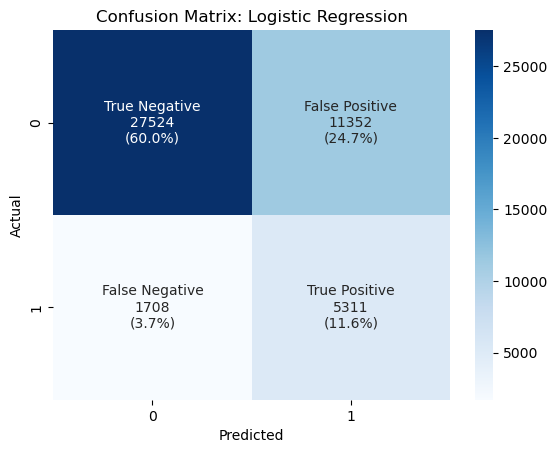

In [102]:
# Evaluation Metrics

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Weighted Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
print(f"Weighted Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
print(f"Weighted F1 Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
print()
print(classification_report(y_test, y_pred))

print()
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, "Logistic Regression")

In [103]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=12 ,n_estimators =10, random_state=42 )

# rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_balanced, y_train_balanced)
rf_ypred  = rf.predict(X_test)

Accuracy: 0.79
Weighted Precision: 0.84
Weighted Recall: 0.79
Weighted F1 Score: 0.81

              precision    recall  f1-score   support

         0.0       0.92      0.82      0.87     38876
         1.0       0.38      0.60      0.46      7019

    accuracy                           0.79     45895
   macro avg       0.65      0.71      0.67     45895
weighted avg       0.84      0.79      0.81     45895


[[31882  6994]
 [ 2778  4241]]


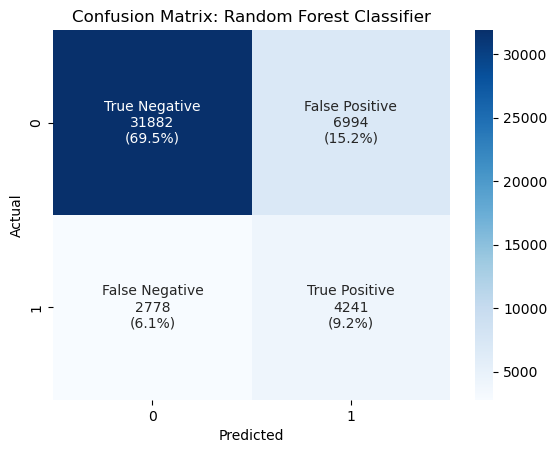

In [104]:
# Evaluation Metrics

print(f"Accuracy: {accuracy_score(y_test, rf_ypred):.2f}")
print(f"Weighted Precision: {precision_score(y_test, rf_ypred, average='weighted'):.2f}")
print(f"Weighted Recall: {recall_score(y_test, rf_ypred, average='weighted'):.2f}")
print(f"Weighted F1 Score: {f1_score(y_test, rf_ypred, average='weighted'):.2f}")
print()
print(classification_report(y_test, rf_ypred))

print()
print(confusion_matrix(y_test, rf_ypred))
plot_confusion_matrix(y_test, rf_ypred, "Random Forest Classifier")

In [105]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

gnb.fit(X_train_balanced, y_train_balanced)
gnb_ypred = gnb.predict(X_test)

Accuracy: 0.69
Weighted Precision: 0.84
Weighted Recall: 0.69
Weighted F1 Score: 0.74

              precision    recall  f1-score   support

         0.0       0.94      0.68      0.79     38876
         1.0       0.30      0.75      0.43      7019

    accuracy                           0.69     45895
   macro avg       0.62      0.72      0.61     45895
weighted avg       0.84      0.69      0.74     45895


[[26625 12251]
 [ 1763  5256]]


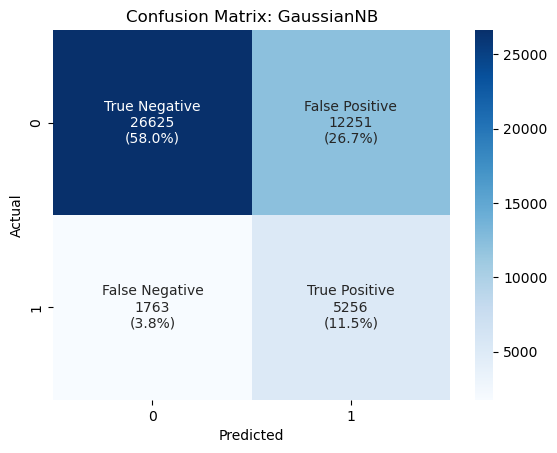

In [106]:
# Evaluation Metrics

print(f"Accuracy: {accuracy_score(y_test, gnb_ypred):.2f}")
print(f"Weighted Precision: {precision_score(y_test, gnb_ypred, average='weighted'):.2f}")
print(f"Weighted Recall: {recall_score(y_test, gnb_ypred, average='weighted'):.2f}")
print(f"Weighted F1 Score: {f1_score(y_test, gnb_ypred, average='weighted'):.2f}")
print()
print(classification_report(y_test, gnb_ypred))

print()
print(confusion_matrix(y_test, gnb_ypred))
plot_confusion_matrix(y_test, gnb_ypred, "GaussianNB")

In [107]:
from sklearn.utils.class_weight import compute_class_weight

# Calculate class imbalance ratio
class_weights = compute_class_weight("balanced", classes=np.unique(y), y=y)
scale_pos_weight = class_weights[1] / class_weights[0]  # Ratio of majority to minority class

In [108]:
scale_pos_weight

5.538279625039177

Accuracy: 0.70
Weighted Precision: 0.85
Weighted Recall: 0.70
Weighted F1 Score: 0.74

              precision    recall  f1-score   support

         0.0       0.95      0.68      0.79     38876
         1.0       0.31      0.80      0.45      7019

    accuracy                           0.70     45895
   macro avg       0.63      0.74      0.62     45895
weighted avg       0.85      0.70      0.74     45895


[[26421 12455]
 [ 1432  5587]]


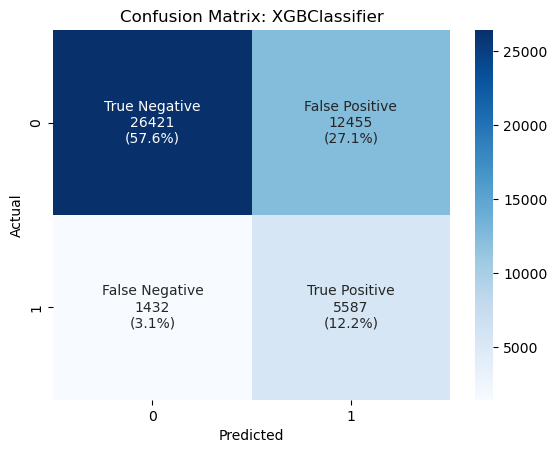

In [109]:
import xgboost as xgb


### Train XGBoost ###
xgb_model = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, eval_metric="logloss", use_label_encoder=False)
xgb_model.fit(X_train_balanced, y_train_balanced)
xgb_preds = xgb_model.predict(X_test)

# Evaluation Metrics

print(f"Accuracy: {accuracy_score(y_test, xgb_preds):.2f}")
print(f"Weighted Precision: {precision_score(y_test, xgb_preds, average='weighted'):.2f}")
print(f"Weighted Recall: {recall_score(y_test, xgb_preds, average='weighted'):.2f}")
print(f"Weighted F1 Score: {f1_score(y_test, xgb_preds, average='weighted'):.2f}")
print()
print(classification_report(y_test, xgb_preds))

print()
print(confusion_matrix(y_test, xgb_preds))
plot_confusion_matrix(y_test, xgb_preds, "XGBClassifier")

# HYPERPARAMETER TUNING AND CROSS-VALIDATION

In [110]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 300, 500, 1000],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0.5, 1.0, 1.5, 2.0]
}

# Initialize XGBClassifier
xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss')

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model, 
    param_distributions=param_grid, 
    n_iter=20,  # Try 20 different combinations
    scoring='roc_auc', 
    cv=5, 
    verbose=2, 
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train_balanced, y_train_balanced)


# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)



# Best model evaluation
best_xgb = random_search.best_estimator_
print("Best XGBoost Model Score:", best_xgb.score(X_test, y_test))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': 0.8, 'reg_lambda': 0.5, 'reg_alpha': 0, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.8}
Best Score: 0.9585319748120332
Best XGBoost Model Score: 0.6561499073973199


In [111]:
y_pred_xgb = best_xgb.predict(X_test)

Accuracy: 0.66
Weighted Precision: 0.86
Weighted Recall: 0.66
Weighted F1 Score: 0.70

              precision    recall  f1-score   support

         0.0       0.96      0.62      0.75     38876
         1.0       0.29      0.85      0.43      7019

    accuracy                           0.66     45895
   macro avg       0.62      0.74      0.59     45895
weighted avg       0.86      0.66      0.70     45895


[[24151 14725]
 [ 1056  5963]]


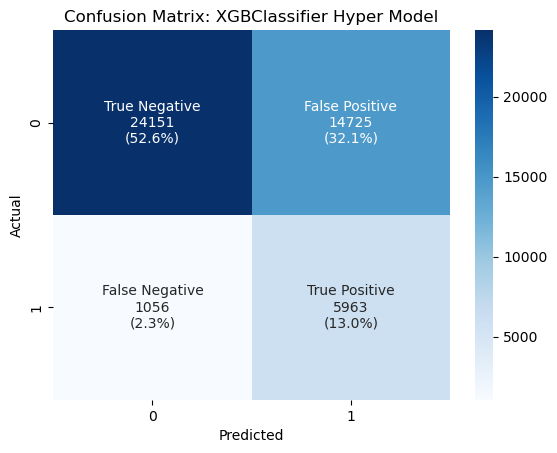

In [112]:
# Evaluation Metrics

print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.2f}")
print(f"Weighted Precision: {precision_score(y_test, y_pred_xgb, average='weighted'):.2f}")
print(f"Weighted Recall: {recall_score(y_test, y_pred_xgb, average='weighted'):.2f}")
print(f"Weighted F1 Score: {f1_score(y_test, y_pred_xgb, average='weighted'):.2f}")
print()
print(classification_report(y_test, y_pred_xgb))

print()
print(confusion_matrix(y_test, y_pred_xgb))
plot_confusion_matrix(y_test, y_pred_xgb, "XGBClassifier Hyper Model")

In [113]:

# Logistic Regression hyperparameters
param_distributions_lr = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # liblinear supports both l1 and l2 penalties
}

# Number of parameter settings that are sampled
n_iter_search = 20

# Number of cross-validation folds
cv = 5

In [114]:

# Setuping RandomizedSearchCV

# Logistic Regression
lr = LogisticRegression()
random_search_lr = RandomizedSearchCV(
    estimator=lr,
    param_distributions=param_distributions_lr,
    n_iter=n_iter_search,
    cv=cv,
    random_state=42,
    n_jobs=-1
)
random_search_lr.fit(X_train_balanced, y_train_balanced)
print("Best Logistic Regression Parameters:", random_search_lr.best_params_)
print("Best Logistic Regression CV Score:", random_search_lr.best_score_)


Best Logistic Regression Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.0018329807108324356}
Best Logistic Regression CV Score: 0.7398666427908155


Accuracy: 0.71
Weighted Precision: 0.85
Weighted Recall: 0.71
Weighted F1 Score: 0.75

              precision    recall  f1-score   support

         0.0       0.94      0.70      0.81     38876
         1.0       0.32      0.76      0.45      7019

    accuracy                           0.71     45895
   macro avg       0.63      0.73      0.63     45895
weighted avg       0.85      0.71      0.75     45895


[[27397 11479]
 [ 1679  5340]]


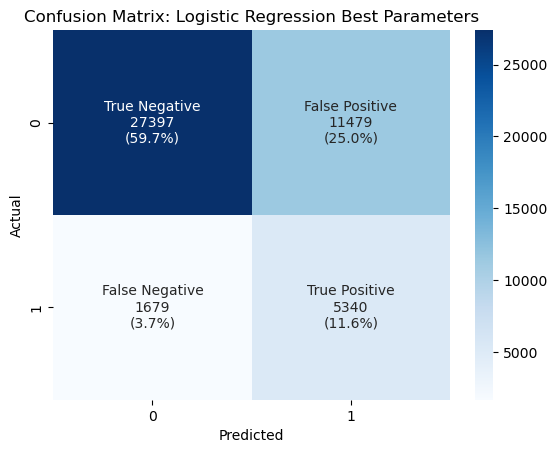

In [115]:

# Evaluate the best model on the test set

best_lr = random_search_lr.best_estimator_



y_pred_lr = best_lr.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")
print(f"Weighted Precision: {precision_score(y_test, y_pred_lr, average='weighted'):.2f}")
print(f"Weighted Recall: {recall_score(y_test, y_pred_lr, average='weighted'):.2f}")
print(f"Weighted F1 Score: {f1_score(y_test, y_pred_lr, average='weighted'):.2f}")
print()
print(classification_report(y_test, y_pred_lr))

print()
print(confusion_matrix(y_test,y_pred_lr))
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression Best Parameters")


# MODEL VISUALIZATIONS

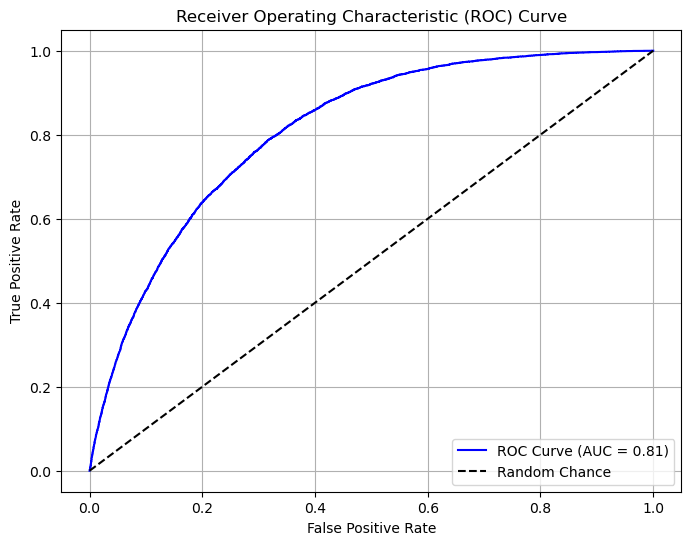

In [117]:

# Predicted probabilities
y_pred_proba = best_lr.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

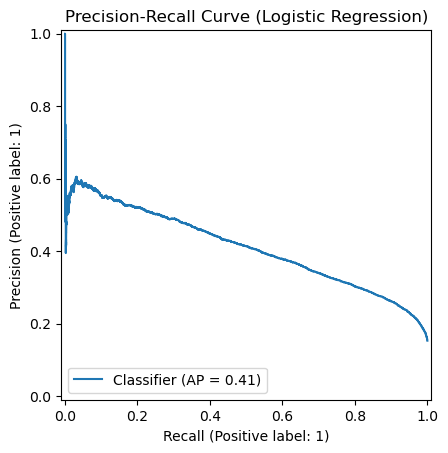

In [118]:
# Plot Precision-Recall curve
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.title("Precision-Recall Curve (Logistic Regression)")
plt.show()

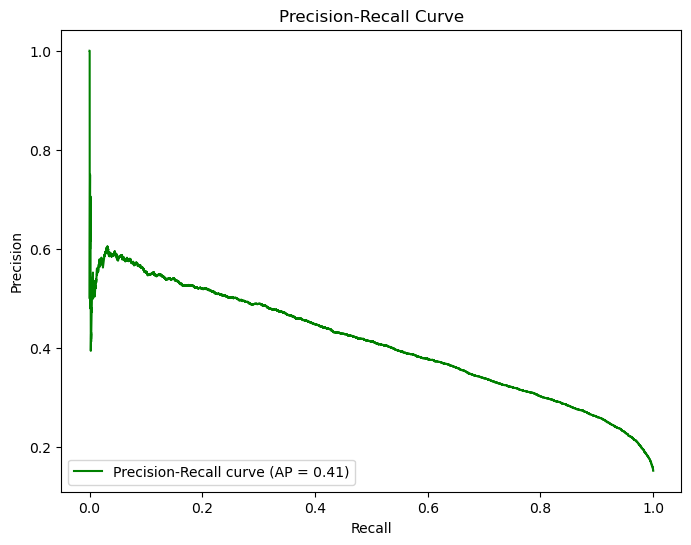

In [119]:
# 3. Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='green', label=f"Precision-Recall curve (AP = {average_precision:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()

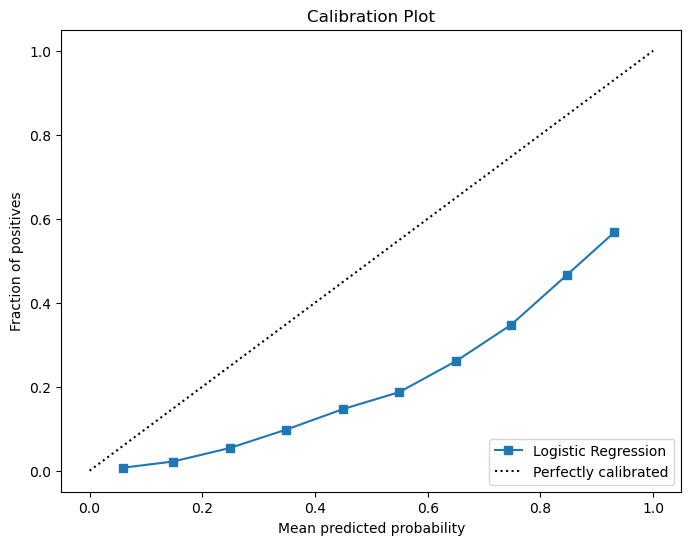

In [120]:
# 4. Calibration Plot
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_pred_proba, n_bins=10)
plt.figure(figsize=(8,6))
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="Logistic Regression")
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")
plt.title("Calibration Plot")
plt.legend(loc="lower right")
plt.show()

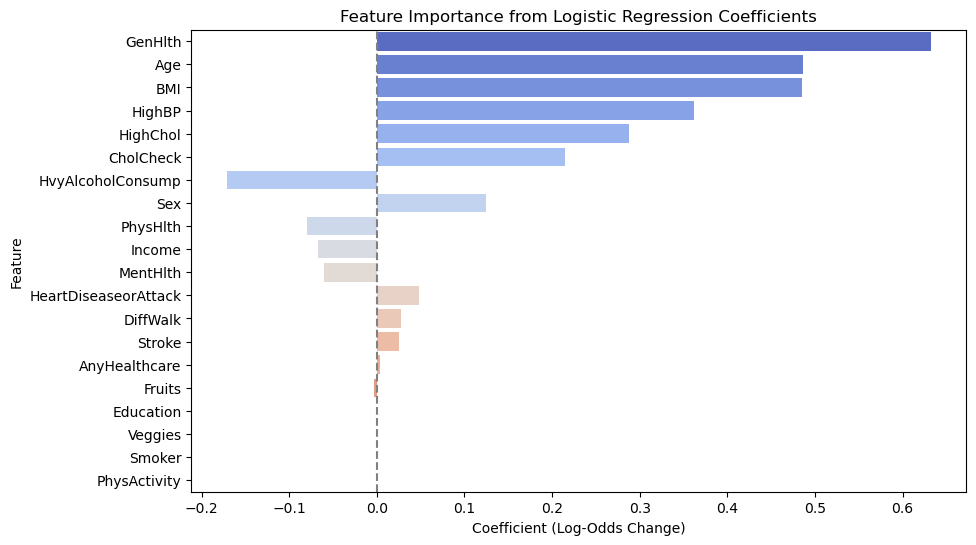

In [121]:
coefficients = best_lr.coef_[0]
features = X.columns

# Create a DataFrame for visualization
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

# Plot a horizontal bar chart for feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
plt.title('Feature Importance from Logistic Regression Coefficients')
plt.xlabel('Coefficient (Log-Odds Change)')
plt.ylabel('Feature')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

In [122]:


# Creating a folder to save the best models if it doesn't exist
save_folder = "saved_models"
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

# Saving the best models using pickle
with open(os.path.join(save_folder, "diabetes_prediction.pkl"), "wb") as file:
    pickle.dump(best_lr, file)
    

# Save the scaler
with open(os.path.join(save_folder, "scaler.pkl"), "wb") as file:
    pickle.dump(scaler, file)


print(f"Model saved successfully in the '{save_folder}' folder.\n")

Model saved successfully in the 'saved_models' folder.



In [211]:
# Loading the saved model
save_folder = "saved_models/"  # Replace with your actual folder path
model_path = os.path.join(save_folder, "diabetes_prediction_xgb_2.pkl")

with open(model_path, "rb") as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully!")

Model loaded successfully!


In [214]:
print(confusion_matrix(y_test, yp))


[[24151 14725]
 [ 1056  5963]]


In [227]:
yp = loaded_model.predict(X_test)

In [228]:

feature_names = X.columns

# Get feature importances from the XGBoost model
importances = loaded_model.feature_importances_

# Create a DataFrame with feature names and their importance
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)



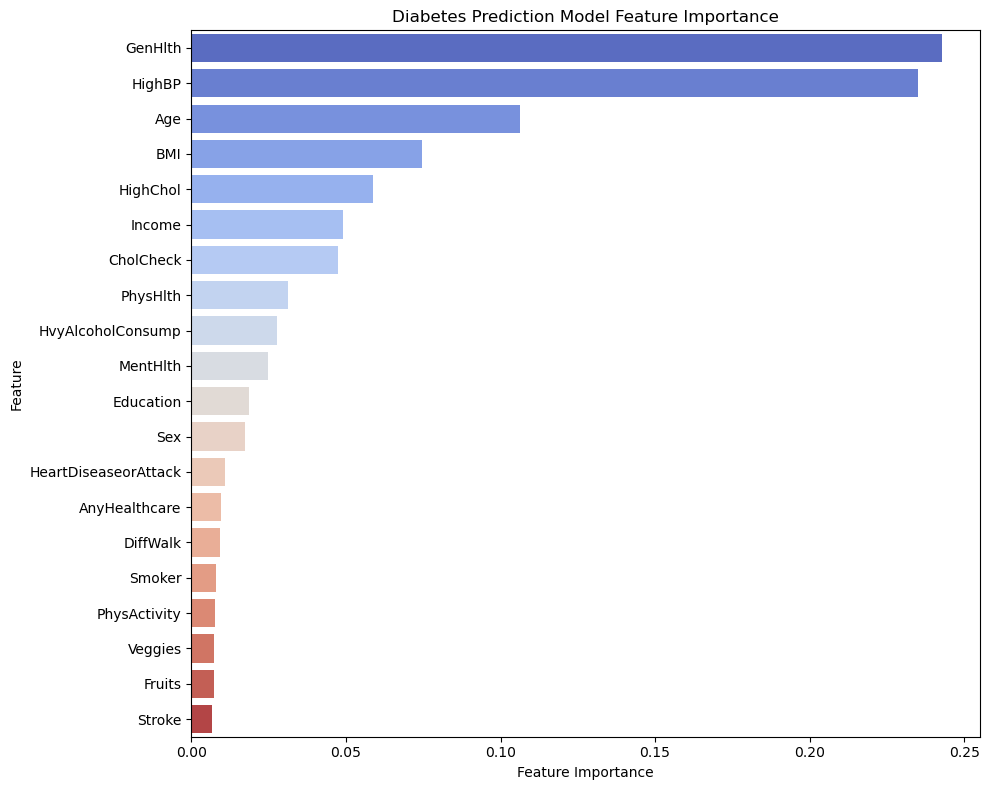

In [230]:

# # Ensure the DataFrame is sorted in descending order by Importance
# feature_importance_df = feature_importance_df.sort_values("Importance", ascending=False)

# Create an ordered list of features (highest importance first)
ordered_features = feature_importance_df["Feature"].tolist()

plt.figure(figsize=(10, 8))
ax = sns.barplot(
    data=feature_importance_df, 
    x="Importance", 
    y="Feature", 
    palette="coolwarm", 
    order=ordered_features
)
ax.set_title("Diabetes Prediction Model Feature Importance")
ax.set_xlabel("Feature Importance")
ax.set_ylabel("Feature")
plt.tight_layout()
plt.show()
